Import dependencies

In [1]:
from pathlib import Path
import pandas as pd

Connect to the sqlite3

In [2]:
#website: https://sqliteviewer.app/#/
import sqlite3

# Connecting to sqlite
conn = sqlite3.connect('titanic2.db')

# Creating a cursor object using the cursor() method
cursor = conn.cursor()

#df_testing.to_sql('test_table',conn)
#df_training.to_sql('train_table', conn)
# Commit your changes in the database    
# conn.commit()
# Closing the connection
# conn.close()


Load the  trainning data from the database as a DatarFrame

In [3]:
# Select all the columns from the train_table
import sqlite3
data=pd.read_sql_query("SELECT * FROM train_table", conn)
print(data)

     index  PassengerId  Survived  Pclass  \
0        0            1         0       3   
1        1            2         1       1   
2        2            3         1       3   
3        3            4         1       1   
4        4            5         0       3   
..     ...          ...       ...     ...   
886    886          887         0       2   
887    887          888         1       1   
888    888          889         0       3   
889    889          890         1       1   
890    890          891         0       3   

                                                  Name  Sex        Age  SibSp  \
0                              Braund, Mr. Owen Harris    0  22.000000      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.000000      1   
2                               Heikkinen, Miss. Laina    1  26.000000      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.000000      1   
4                             Allen, Mr. William Henry

In [4]:
# convert the data into the trainning dataframe
df_training= pd.DataFrame(data)
df_training.head(10)

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,B96 B98,0
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,C85,1
2,2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,B96 B98,0
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,C123,0
4,4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,B96 B98,0
5,5,6,0,3,"Moran, Mr. James",0,29.699118,0,0,330877,8.4583,B96 B98,2
6,6,7,0,1,"McCarthy, Mr. Timothy J",0,54.000000,0,0,17463,51.8625,E46,0
7,7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.000000,3,1,349909,21.0750,B96 B98,0
8,8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.000000,0,2,347742,11.1333,B96 B98,0
9,9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.000000,1,0,237736,30.0708,B96 B98,1


In [5]:
# categorize data into bins to checkout the age distribution among passegers
bins = [0, 5, 17, 25, 50, 80]
labels = ['Infant', 'Kid', 'Young', 'Adult', 'Old']
df_training['Age'] = pd.cut(df_training['Age'], bins = bins, labels=labels)

In [6]:
# print the data frame
# majority were the senior adults on board with the young making up a small %
pd.DataFrame(df_training['Age'].value_counts())


,Age
Adult,526
Young,188
Kid,69
Old,64
Infant,44


Load testing data

In [7]:
# Load 
# testing data

# Select all the columns from the test_table
import sqlite3
dat =pd.read_sql_query("SELECT * FROM test_table", conn)
print(dat)


     index  PassengerId  Pclass                                          Name  \
0        0          892       3                              Kelly, Mr. James   
1        1          893       3              Wilkes, Mrs. James (Ellen Needs)   
2        2          894       2                     Myles, Mr. Thomas Francis   
3        3          895       3                              Wirz, Mr. Albert   
4        4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
..     ...          ...     ...                                           ...   
413    413         1305       3                            Spector, Mr. Woolf   
414    414         1306       1                  Oliva y Ocana, Dona. Fermina   
415    415         1307       3                  Saether, Mr. Simon Sivertsen   
416    416         1308       3                           Ware, Mr. Frederick   
417    417         1309       3                      Peter, Master. Michael J   

     Sex       Age  SibSp  

In [8]:
# categorize data into bins to checkout the age distribution among passegers
bins = [0, 5, 17, 25, 50, 80]
labels = ['Infant', 'Kid', 'Young', 'Adult', 'Old']
dat['Age'] = pd.cut(dat['Age'], bins = bins, labels=labels)

In [9]:
# print the data frame
# majority were the senior adults on board with the young making up a small %
pd.DataFrame(dat['Age'].value_counts())

,Age
Adult,245
Young,101
Old,31
Kid,29
Infant,12


In [10]:
# convert the data into the trainning and testing  dataframe
df_testing= pd.DataFrame(dat)
df_testing.head(10)

,index,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,892,3,"Kelly, Mr. James",0,Adult,0,0,330911,7.8292,B57 B59 B63 B66,2
1,1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,Adult,1,0,363272,7.0000,B57 B59 B63 B66,0
2,2,894,2,"Myles, Mr. Thomas Francis",0,Old,0,0,240276,9.6875,B57 B59 B63 B66,2
3,3,895,3,"Wirz, Mr. Albert",0,Adult,0,0,315154,8.6625,B57 B59 B63 B66,0
4,4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,Young,1,1,3101298,12.2875,B57 B59 B63 B66,0
5,5,897,3,"Svensson, Mr. Johan Cervin",0,Kid,0,0,7538,9.2250,B57 B59 B63 B66,0
6,6,898,3,"Connolly, Miss. Kate",1,Adult,0,0,330972,7.6292,B57 B59 B63 B66,2
7,7,899,2,"Caldwell, Mr. Albert Francis",0,Adult,1,1,248738,29.0000,B57 B59 B63 B66,0
8,8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",1,Young,0,0,2657,7.2292,B57 B59 B63 B66,1
9,9,901,3,"Davies, Mr. John Samuel",0,Young,2,0,A/4 48871,24.1500,B57 B59 B63 B66,0


In [11]:
%matplotlib inline

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

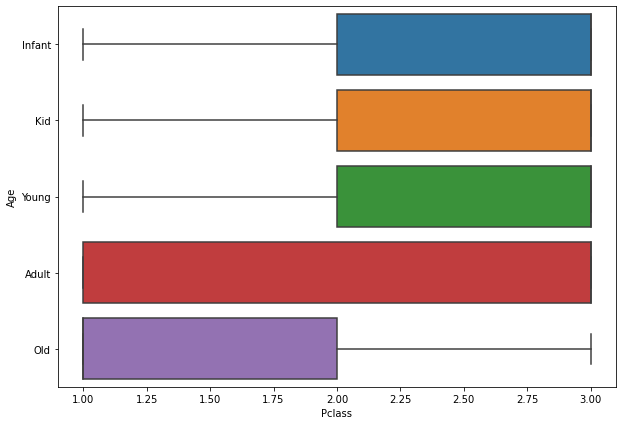

In [17]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass',y='Age',data=df_training)

# Prepare and clean data

In [ ]:
# check for null values in both training and testing datasets

# training data nulls
df_training.isnull().sum()

In [ ]:
# test data nulls
df_testing.isnull().sum()

In [ ]:
# Transform the gender column into a categorical column
df_training.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)
df_testing.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

In [ ]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd


In [ ]:
# Split our preprocessed data into our features and target arrays
y = df_training['Survived'].values
X = df_training.drop(['Cabin','PassengerId','Survived','Name','Age', 'SibSp', 'Parch', 'Fare','Ticket'],1).values
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [ ]:
# Create a Logistic Regression Model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [ ]:
# Fit (train) or model using the training data
model.fit(X_train, y_train)



In [ ]:
# Make predictions
y_pred = model.predict(X_test)
print(y_pred)

In [ ]:

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

In [ ]:
from sklearn.metrics  import confusion_matrix, classification_report
matrix = confusion_matrix(y_test, y_pred)
print(matrix)

In [ ]:
report = classification_report(y_test, y_pred)
print(report)

In [ ]:
# df_testing.to_sql('test_table',conn)
# df_training.to_sql('train_table', conn)
# Commit your changes in the database    
conn.commit()
# Closing the connection
conn.close()